In [166]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, confusion_matrix, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [111]:
annual = pd.read_csv('/Users/navamongkoltongta/.kaggle/GoldPrice/annual_csv.csv')
monthly = pd.read_csv('/Users/navamongkoltongta/.kaggle/GoldPrice/monthly_csv.csv')

In [112]:
annual.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [113]:
monthly.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [114]:
annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    70 non-null     object 
 1   Price   70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [115]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


## Data Preprocessing

In [124]:
monthly['Year'] = monthly['Date'].apply(lambda x : x[0:4]).astype(int)
monthly['Month'] = monthly['Date'].apply(lambda x : x[5:7]).astype(int)

In [125]:
monthly.isna().sum()

Date     0
Price    0
Year     0
Month    0
dtype: int64

In [126]:
monthly.head()

,Date,Price,Year,Month
0,1950-01,34.73,1950,1
1,1950-02,34.73,1950,2
2,1950-03,34.73,1950,3
3,1950-04,34.73,1950,4
4,1950-05,34.73,1950,5


## EDA data

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
sns.set()

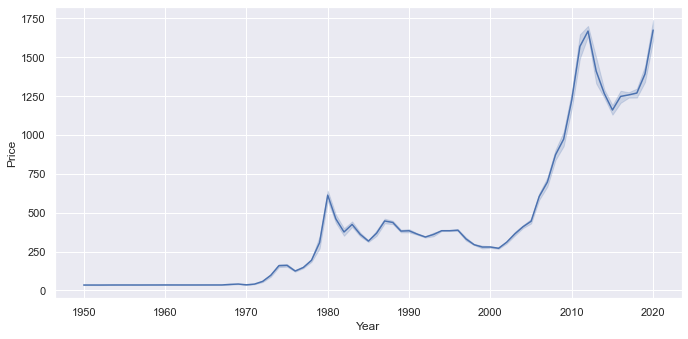

In [128]:
sns.lineplot(x=monthly['Year'], y=monthly['Price'], data=monthly)
plt.show()

In [252]:
f_data = monthly.iloc[:600]
l_data = monthly.iloc[600:]

In [253]:
l_data.head()

,Date,Price,Year,Month
600,2000-01,284.590,2000,1
601,2000-02,300.855,2000,2
602,2000-03,286.704,2000,3
603,2000-04,279.961,2000,4
604,2000-05,275.293,2000,5


In [255]:
X = f_data[['Year','Month']]
y = f_data[['Price']]

In [256]:
model = RandomForestRegressor().fit(X,y.values.ravel())

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [286]:
model.score(X_train, y_train)

0.9991734941159207

In [287]:
model.score(X_test, y_test)

0.9994650626853465

In [288]:
model.feature_importances_

array([0.98893153, 0.01106847])

In [289]:
pred = model.predict(l_data[['Year','Month']])

In [290]:
pred_ = pd.DataFrame(data=pred,columns=["pred"])

In [291]:
pred_

,pred
0,287.69951
1,287.08104
2,286.04250
3,283.02237
4,276.57278
...,...
242,286.04250
243,283.02237
244,276.57278
245,265.92631


In [292]:
l_data[['Price']]

,Price
600,284.590
601,300.855
602,286.704
603,279.961
604,275.293
...,...
842,1593.764
843,1680.030
844,1715.697
845,1734.032


In [294]:
rmse = mean_squared_error(l_data[['Price']], pred_, squared=False)
print(f"RMSE: {rmse}")

RMSE: 826.318771088149


In [360]:
actual = l_data[['Price']]

In [361]:
actual.reset_index(drop=True, inplace=True)

In [369]:
actual

,Price
0,284.590
1,300.855
2,286.704
3,279.961
4,275.293
...,...
242,1593.764
243,1680.030
244,1715.697
245,1734.032


In [370]:
pred_

,pred
0,287.69951
1,287.08104
2,286.04250
3,283.02237
4,276.57278
...,...
242,286.04250
243,283.02237
244,276.57278
245,265.92631


In [371]:
result = pred_.merge(actual, left_index=True, right_index=True)

In [372]:
result

,pred,Price
0,287.69951,284.590
1,287.08104,300.855
2,286.04250,286.704
3,283.02237,279.961
4,276.57278,275.293
...,...,...
242,286.04250,1593.764
243,283.02237,1680.030
244,276.57278,1715.697
245,265.92631,1734.032


<AxesSubplot:>

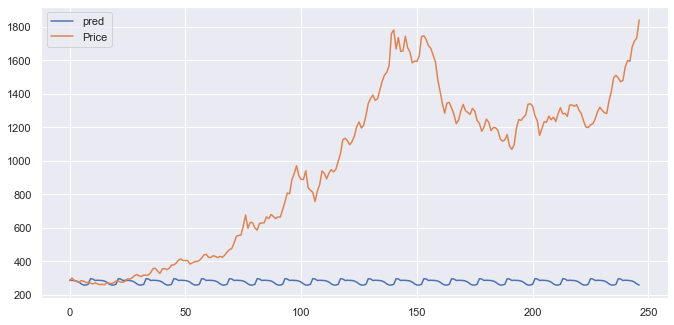

In [373]:
result.plot()

In [375]:
pred = model.predict(X_train)

In [381]:
pred_ = pd.DataFrame(data=pred)
pred_

,0
0,35.07860
1,65.71269
2,286.29047
3,400.85093
4,342.28628
...,...
415,34.97380
416,35.10130
417,64.56614
418,341.82486


In [383]:
y_train.reset_index(drop=True, inplace=True)

In [385]:
result

,0,Price
0,35.07860,35.070
1,65.71269,65.589
2,286.29047,283.743
3,400.85093,409.655
4,342.28628,342.325
...,...,...
415,34.97380,34.970
416,35.10130,35.100
417,64.56614,65.558
418,341.82486,340.716


<AxesSubplot:>

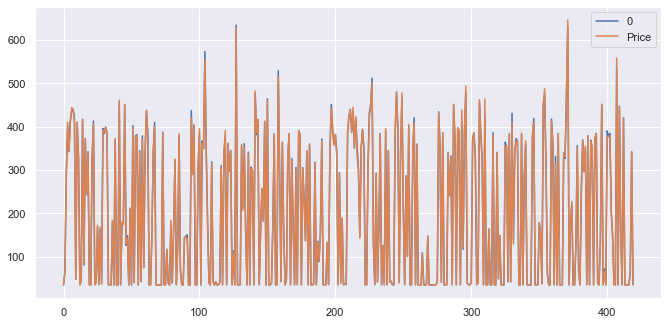

In [386]:
result.plot()